In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [6]:
chips = pd.read_csv("20200121_designspace_sweep.csv")

In [10]:
valid_chips = chips[chips["score"]>0]

In [12]:
valid_chips.sort_values("score")

,Unnamed: 0,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,score,size_score,rate_score,hulls
15795,15795,3.0,2.0,4.0,1.0,2.5,125,2.269461,82.883179,2.280468,<scipy.spatial.qhull.ConvexHull object at 0x00...
16817,16817,3.0,6.0,3.5,2.0,3.0,125,2.958881,173.625366,0.034084,<scipy.spatial.qhull.ConvexHull object at 0x00...
16823,16823,3.0,6.0,4.0,2.5,3.0,125,6.250873,158.871902,0.078719,<scipy.spatial.qhull.ConvexHull object at 0x00...
28013,28013,3.0,6.0,3.0,2.5,2.0,175,13.562050,148.180817,0.159456,<scipy.spatial.qhull.ConvexHull object at 0x00...
22419,22419,3.0,6.0,3.5,3.0,2.5,150,17.694176,157.842255,0.224201,<scipy.spatial.qhull.ConvexHull object at 0x00...
28019,28019,3.0,6.0,3.5,3.0,2.0,175,18.723514,124.753738,0.312722,<scipy.spatial.qhull.ConvexHull object at 0x00...
25895,25895,2.5,2.0,4.0,1.0,2.0,175,27.443474,85.969025,5.888191,<scipy.spatial.qhull.ConvexHull object at 0x00...
22394,22394,3.0,6.0,3.5,3.0,2.0,150,30.192286,118.420883,0.532535,<scipy.spatial.qhull.ConvexHull object at 0x00...
22288,22288,3.0,5.5,3.0,2.5,2.5,150,31.577091,179.660477,0.351520,<scipy.spatial.qhull.ConvexHull object at 0x00...
27022,27022,3.0,2.0,4.0,2.0,2.0,175,31.917852,79.535110,4.309765,<scipy.spatial.qhull.ConvexHull object at 0x00...


In [25]:
valid_chips.loc[11629, :].to_dict()

{'Unnamed: 0': 11629,
 'aspect_ratio': 1.0,
 'expansion_ratio': 3.5,
 'normalized_oil_inlet': 2.0,
 'normalized_orifice_length': 3.0,
 'normalized_water_inlet': 2.0,
 'orifice_size': 125,
 'score': 37380.676778369874,
 'size_score': 126.21073150634766,
 'rate_score': 460.0162353515625,
 'hulls': '<scipy.spatial.qhull.ConvexHull object at 0x000001C05DEA6BE0>'}

REGIME 1
0.3611111111111111
{'aspect_ratio': 1.0, 'expansion_ratio': 3.5, 'normalized_oil_inlet': 2.0, 'normalized_orifice_length': 3.0, 'normalized_water_inlet': 2.0, 'orifice_size': 125, 'flow_rate_ratio': 10.88888888888889, 'capillary_number': 0.3611111111111111}
REGIME 2
0.32222222222222224
{'aspect_ratio': 1.0, 'expansion_ratio': 3.5, 'normalized_oil_inlet': 2.0, 'normalized_orifice_length': 3.0, 'normalized_water_inlet': 2.0, 'orifice_size': 125, 'flow_rate_ratio': 2.0, 'capillary_number': 0.32222222222222224}
0.32222222222222224
Dropped 20 points


TESTING


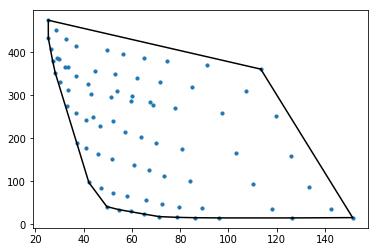

In [27]:
lowest = {'aspect_ratio': 3.0,
 'expansion_ratio': 2.0,
 'normalized_oil_inlet': 4.0,
 'normalized_orifice_length': 1.0,
 'normalized_water_inlet': 2.5,
 'orifice_size': 125}

highest = {'aspect_ratio': 1.0,
 'expansion_ratio': 3.5,
 'normalized_oil_inlet': 2.0,
 'normalized_orifice_length': 3.0,
 'normalized_water_inlet': 2.0,
 'orifice_size': 125}

sizes, rates = sweep_results(highest, sweep_size=10, jet_drop=True, ca_range=[.05, .4])
points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
hull = ConvexHull(points)
plt.scatter(points[:,0], points[:,1], s=10)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')